In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Libraries loaded.")

Libraries loaded.


In [19]:
#Data loading and checking shape for basic understanding


train = pd.read_csv("D:/BTD/rossman-eda-ml/data/raw/train.csv",dtype={'StateHoliday': 'str'})
test = pd.read_csv("D:/BTD/rossman-eda-ml/data/raw/test.csv")
store = pd.read_csv("D:/BTD/rossman-eda-ml/data/raw/store.csv")

print("Files loaded.")
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Store shape:", store.shape)

store.head()
train.tail()


Files loaded.
Train shape: (1017209, 9)
Test shape: (41088, 8)
Store shape: (1115, 10)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,01-01-2013,0,0,0,0,0,1
1017205,1112,2,01-01-2013,0,0,0,0,0,1
1017206,1113,2,01-01-2013,0,0,0,0,0,1
1017207,1114,2,01-01-2013,0,0,0,0,0,1
1017208,1115,2,01-01-2013,0,0,0,0,0,1


In [22]:
#Checking null values before merging datasets

print("Train missing values:")
print(train.isnull().sum())

print("\nStore missing values:")
print(store.isnull().sum())

print("\nTest missing values:")
print(test.isnull().sum())


Train missing values:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Store missing values:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Test missing values:
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


In [25]:
#Store.csv Missing value handling

#Competition Distance: Store dint know the distance to the nearest competitor store, so i will use medain to fullfill the null values
store['CompetitionDistance'] = store['CompetitionDistance'].fillna(store['CompetitionDistance'].median())

#CompetitionOpenSinceMonth & CompetitionOpenSinceYear: If no date -> assume no competition -> I could impute with the store’s open date, or just use 0.
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode()[0])
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode()[0])

#Promo2SinceWeek, Promo2SinceYear, PromoInterval: These stores don’t run continuous Promo2 campaigns, Missing actually means Promo2 = 0.
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(0)
store['PromoInterval'] = store['PromoInterval'].fillna('None')


print(f"CompetitionDistance filled: {store['CompetitionDistance'].isnull().sum()} missing")
print(f"CompetitionOpenSinceMonth filled: {store['CompetitionOpenSinceMonth'].isnull().sum()} missing")
print(f"CompetitionOpenSinceYear filled: {store['CompetitionOpenSinceYear'].isnull().sum()} missing")
print(f"Promo2SinceWeek filled: {store['Promo2SinceWeek'].isnull().sum()} missing")
print(f"Promo2SinceYear filled: {store['Promo2SinceYear'].isnull().sum()} missing")
print(f"PromoInterval filled: {store['PromoInterval'].isnull().sum()} missing")


CompetitionDistance filled: 0 missing
CompetitionOpenSinceMonth filled: 0 missing
CompetitionOpenSinceYear filled: 0 missing
Promo2SinceWeek filled: 0 missing
Promo2SinceYear filled: 0 missing
PromoInterval filled: 0 missing


In [29]:
#Test.csv Missing value handling

#Store didnt’t know if the store was open on those days, this can happen because test data is from future dates(like holdiays store didnt know about)
test['Open'] = test['Open'].fillna(1)

#Result: check that Open has no missing values now
print(f"Open filled: {test['Open'].isnull().sum()} missing")

Open filled: 0 missing


StoreType distribution:
StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64
This shows how many stores belong to each store type (a, b, c, d). Good for grouping.

Assortment distribution:
Assortment
a    593
c    513
b      9
Name: count, dtype: int64
Shows how many stores have basic, extra, or extended product assortment.

CompetitionDistance stats:
count     1115.000000
mean      5396.614350
std       7654.513635
min         20.000000
25%        720.000000
50%       2325.000000
75%       6875.000000
max      75860.000000
Name: CompetitionDistance, dtype: float64
Shows how close stores are to competitors. Median and spread help you see typical competition distances.


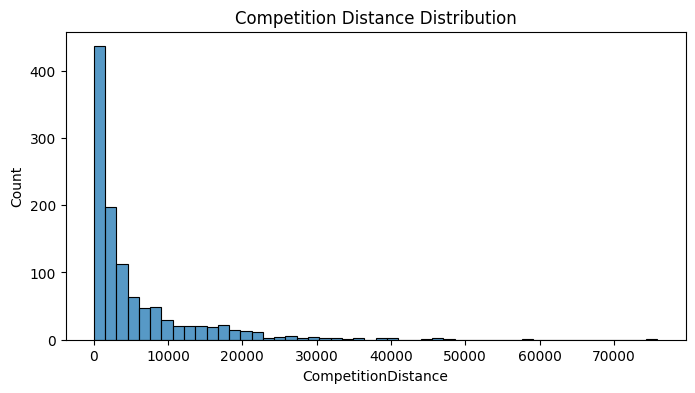


Promo2 distribution:
Promo2
1    571
0    544
Name: count, dtype: int64
Shows how many stores run continuous promotions (Promo2) versus those that do not.


In [33]:
#Store.csv Individual insights

# 1. StoreType distribution
print("StoreType distribution:")
print(store['StoreType'].value_counts())
print("This shows how many stores belong to each store type (a, b, c, d). Good for grouping.")

# 2. Assortment levels
print("\nAssortment distribution:")
print(store['Assortment'].value_counts())
print("Shows how many stores have basic, extra, or extended product assortment.")

# 3. CompetitionDistance statistics
print("\nCompetitionDistance stats:")
print(store['CompetitionDistance'].describe())
print("Shows how close stores are to competitors. Median and spread help you see typical competition distances.")

plt.figure(figsize=(8,4))
sns.histplot(store['CompetitionDistance'], bins=50)
plt.title("Competition Distance Distribution")
plt.show()

# 4. Promo2 flag
print("\nPromo2 distribution:")
print(store['Promo2'].value_counts())
print("Shows how many stores run continuous promotions (Promo2) versus those that do not.")


Train: Sales column basic stats:
count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

This shows you the average daily sales, spread, and extreme values.

Skewness: 0.6414596158103787  | Kurtosis: 1.7783747472372768
Skewness tells you if the sales distribution is asymmetrical.
Kurtosis tells you how heavy the tails are (extreme outliers).

Average sales by day of the week:
DayOfWeek
1    7809.044510
2    7005.244467
3    6555.884138
4    6247.575913
5    6723.274305
6    5847.562599
7     204.183189
Name: Sales, dtype: float64
Shows which weekdays have higher or lower average sales.

Unique sales values when store is closed: [0]
Sales should be zero when stores are closed. This is a sanity check.

StateHoliday distribution:
StateHoliday
0    987273
a     19146
b      6690
c      4100
Name: count, dtype: int64
Shows how many days were pu

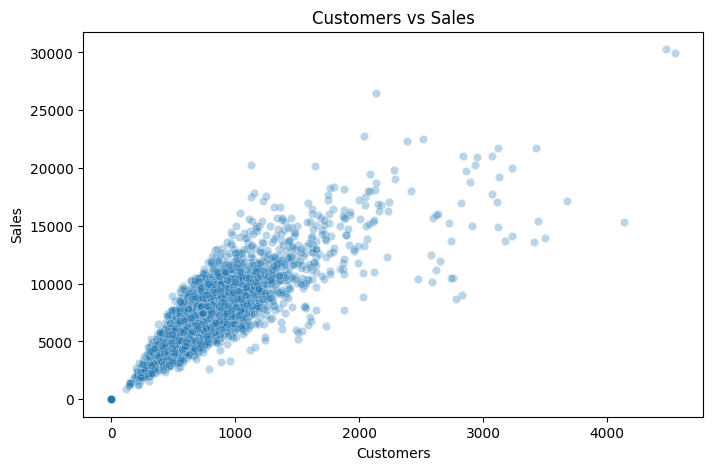

More customers should generally mean higher sales. This shows that relationship.


In [34]:
#Train.csv individual insights

# 1. Basic stats for Sales
print("Train: Sales column basic stats:")
print(train['Sales'].describe())
print("\nThis shows you the average daily sales, spread, and extreme values.")

# 2. Skewness & kurtosis
print("\nSkewness:", train['Sales'].skew(), " | Kurtosis:", train['Sales'].kurtosis())
print("Skewness tells you if the sales distribution is asymmetrical.")
print("Kurtosis tells you how heavy the tails are (extreme outliers).")

# 3. Average sales by day of week
print("\nAverage sales by day of the week:")
print(train.groupby('DayOfWeek')['Sales'].mean())
print("Shows which weekdays have higher or lower average sales.")

# 4. Check sales when store is closed
closed_sales = train[train['Open'] == 0]['Sales'].unique()
print("\nUnique sales values when store is closed:", closed_sales)
print("Sales should be zero when stores are closed. This is a sanity check.")

# 5. StateHoliday distribution
print("\nStateHoliday distribution:")
print(train['StateHoliday'].value_counts())
print("Shows how many days were public holidays or special holidays. Useful for holiday effect analysis.")

# 6. Scatter plot: Customers vs Sales
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(data=train.sample(5000), x='Customers', y='Sales', alpha=0.3)
plt.title("Customers vs Sales")
plt.show()
print("More customers should generally mean higher sales. This shows that relationship.")


In [ ]:
"""
Skewness:

0: Perfectly symmetric distribution (normal).

> 0: Positively skewed → tail on the right side → more high extreme values.

< 0: Negatively skewed → tail on the left side → more low extreme values.

Between -0.5 and 0.5: Roughly symmetric.

Above ±1: Highly skewed — you may need a transformation (like log).

Kurtosis:

≈ 0 (excess kurtosis): Similar to normal distribution tails.

< 0: Platykurtic → flatter peak, light tails → fewer extreme outliers.

> 0: Leptokurtic → sharper peak, heavy tails → more extreme outliers.

> 3 (if using Fisher’s definition): More outliers than normal — check for influential points.
"""

In [36]:
#Test.csv individual insights

# 1. Test set date range
print("Test set date range:")
print(test['Date'].min(), "to", test['Date'].max())
print("Shows the period you of data on which we are foecasting. Useful to compare with the training period.")

# 2. Open column check
print("\nOpen column distribution:")
print(test['Open'].value_counts(dropna=False))
print("Shows how many days stores are open or closed in the test.csv")

# 3. Promo flag in test
print("\nPromo flag distribution:")
print(test['Promo'].value_counts())
print("Shows how many days in the test have an active promo(discounts or offers, stuff like that).")

# 4. StateHoliday in test
print("\nStateHoliday distribution in test:")
print(test['StateHoliday'].value_counts())
print("Shows how many holiday days appear in the predicted period. Optional but good to check for seasonal effects on sales and performance :D.")


Test set date range:
2015-08-01 to 2015-09-17
Shows the period you of data on which we are foecasting. Useful to compare with the training period.

Open column distribution:
Open
1    41088
Name: count, dtype: int64
Shows how many days stores are open or closed in the test.csv

Promo flag distribution:
Promo
0    24824
1    16264
Name: count, dtype: int64
Shows how many days in the test have an active promo(discounts or offers, stuff like that).

StateHoliday distribution in test:
StateHoliday
0    40908
a      180
Name: count, dtype: int64
Shows how many holiday days appear in the predicted period. Optional but good to check for seasonal effects on sales and performance :D.
